In [338]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

from scipy import stats

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro


In [339]:
df = pd.read_csv(r"data/tumanova.csv")

In [340]:
df

,Модель (полное название),Модель процессора,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Тип оперативной памяти,Вид накопителя,Вид графического ускорителя,Количество ядер,Количество потоков,Результа ты в бенчмарке PCMark10
0,Asus ROG Strix GL703GE,Intel Сore i7-8750H,2018,2.2,4.1,8.0,1.0,9,16,2667,DDR4,HDD,Дискретный и встроенный,6,12,3726
1,Lenovo ThinkPad T440,Intel Core i5-4300U,2013,1.9,2.9,5.0,0.5,3,8,1596,DDR3,HDD,Встроенный,2,4,1846
2,Acer Travel Mate P259-MG-39WS,Intel Core i3-6006U,2016,2.0,2.0,4.0,0.5,3,6,2133,DDR4,HDD,Дискретный и встроенный,2,4,1426
3,MacBook Air Mid 2017,Intel Core i7-5650U,2015,2.2,3.2,5.0,0.5,4,8,1600,DDR3,SSD,Встроенный,2,4,2586
4,MacBook Air Mid 2017,Intel Core i5-5350U,2015,1.8,2.9,5.0,0.5,3,8,1600,DDR3,SSD,Встроенный,2,4,2039
5,hp pavilion gaming 15-dk0064ur,Intel Core i5-9300H,2019,2.4,4.1,8.0,1.0,8,8,2666,DDR4,HDD и SSD,Дискретный и встроенный,4,8,3659
6,Lenovo v580c,Intel Core i5-3230M,2013,2.6,3.2,5.0,0.5,3,6,1600,DDR4,HDD,Дискретный и встроенный,2,4,1824
7,Honor Magicbook Pro 4600H,AMD Ryzen 5 4600H,2020,3.0,4.0,6.5,3.0,8,16,2666,DDR4,SSD,Встроенный,6,12,2868
8,Dexp clv-650-sb,Intel Core i5-4210M,2014,2.6,3.2,5.0,0.5,3,8,1600,DDR3,HDD,Дискретный и встроенный,2,4,2561
9,Dell Vostro 5581,Intel Core i5-8265U,2018,1.6,3.9,4.0,1.0,6,8,2666,DDR4,SSD,Встроенный,4,8,3045


In [341]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Модель (полное название)                       30 non-null     object 
 1   Модель процессора                              30 non-null     object 
 2   Год выпуска процессора                         30 non-null     int64  
 3   Тактовая частота процессора(ГГц)               30 non-null     float64
 4   Максимальная тактовая частота процессора(ГГц)  30 non-null     float64
 5   Частота шины процессора(GT/s)                  30 non-null     float64
 6   Объема кэша L2 процессора(Мб)                  30 non-null     float64
 7   Объема кэша L3 процессора(Мб)                  30 non-null     int64  
 8   Объем оперативной памяти (Гб)                  30 non-null     int64  
 9   Частота оперативной памяти (МГц)               30 non-nu

In [343]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [344]:
useless_cols = ['Модель (полное название)', 'Модель процессора']
num_cols = ['Год выпуска процессора','Тактовая частота процессора(ГГц)', 'Максимальная тактовая частота процессора(ГГц)','Частота шины процессора(GT/s)','Объема кэша L2 процессора(Мб)','Объема кэша L3 процессора(Мб)','Объем оперативной памяти (Гб)','Частота оперативной памяти (МГц)','Количество ядер','Количество потоков']
cat_cols = ['Тип оперативной памяти', 'Вид накопителя', 'Вид графического ускорителя']
label = ['Результа ты в бенчмарке PCMark10']

In [345]:
df[cat_cols].dtypes

Тип оперативной памяти         object
Вид накопителя                 object
Вид графического ускорителя    object
dtype: object

In [346]:
df[num_cols].dtypes

Год выпуска процессора                             int64
Тактовая частота процессора(ГГц)                 float64
Максимальная тактовая частота процессора(ГГц)    float64
Частота шины процессора(GT/s)                    float64
Объема кэша L2 процессора(Мб)                    float64
Объема кэша L3 процессора(Мб)                      int64
Объем оперативной памяти (Гб)                      int64
Частота оперативной памяти (МГц)                   int64
Количество ядер                                    int64
Количество потоков                                 int64
dtype: object

## Номинальные признаки

In [347]:
cat_cols

['Тип оперативной памяти', 'Вид накопителя', 'Вид графического ускорителя']

In [348]:
df['Тип оперативной памяти'] = pd.get_dummies(df['Тип оперативной памяти'])['DDR4']

In [349]:
df['Вид графического ускорителя'] = pd.get_dummies(df['Вид графического ускорителя'])['Дискретный и встроенный']

In [350]:
drive = pd.get_dummies(df['Вид накопителя'])
drive.loc[drive['HDD и SSD']==1, ['HDD', 'SSD']] = 1
drive = drive.drop('HDD и SSD', axis=1)
df.drop('Вид накопителя', axis=1)
cat_df = pd.concat([df[['Тип оперативной памяти', 'Вид графического ускорителя']], drive], axis=1) 

In [351]:
cat_df

,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD
0,1,1,1,0
1,0,0,1,0
2,1,1,1,0
3,0,0,0,1
4,0,0,0,1
5,1,1,1,1
6,1,1,1,0
7,1,0,0,1
8,0,1,1,0
9,1,0,0,1


In [352]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [353]:
data = pd.concat([df[num_cols], cat_df, df[label]], axis=1)

In [354]:
data

,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Количество ядер,Количество потоков,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD,Результа ты в бенчмарке PCMark10
0,2018,2.2,4.1,8.0,1.0,9,16,2667,6,12,1,1,1,0,3726
1,2013,1.9,2.9,5.0,0.5,3,8,1596,2,4,0,0,1,0,1846
2,2016,2.0,2.0,4.0,0.5,3,6,2133,2,4,1,1,1,0,1426
3,2015,2.2,3.2,5.0,0.5,4,8,1600,2,4,0,0,0,1,2586
4,2015,1.8,2.9,5.0,0.5,3,8,1600,2,4,0,0,0,1,2039
5,2019,2.4,4.1,8.0,1.0,8,8,2666,4,8,1,1,1,1,3659
6,2013,2.6,3.2,5.0,0.5,3,6,1600,2,4,1,1,1,0,1824
7,2020,3.0,4.0,6.5,3.0,8,16,2666,6,12,1,0,0,1,2868
8,2014,2.6,3.2,5.0,0.5,3,8,1600,2,4,0,1,1,0,2561
9,2018,1.6,3.9,4.0,1.0,6,8,2666,4,8,1,0,0,1,3045


## Анализ критических значений

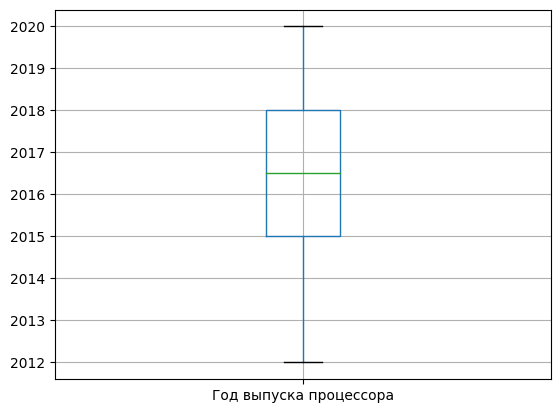

In [355]:
data.boxplot(num_cols[0])
None

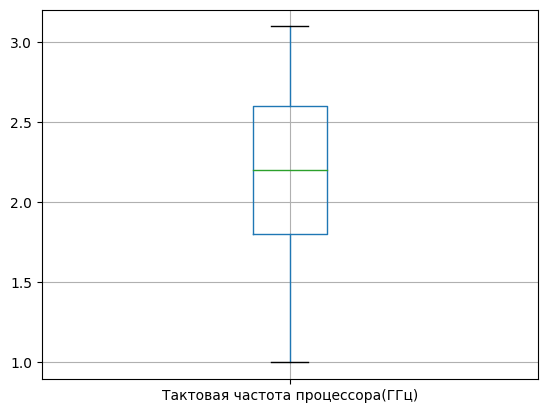

In [356]:
data.boxplot(num_cols[1])
None

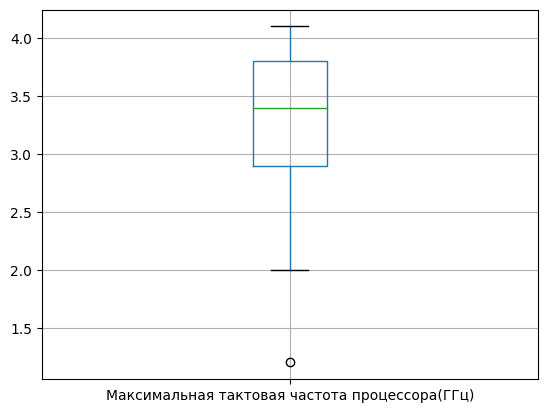

In [357]:
data.boxplot(num_cols[2])
None

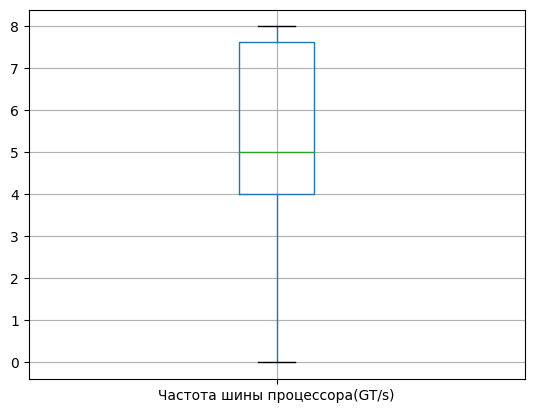

In [358]:
data.boxplot(num_cols[3])
None

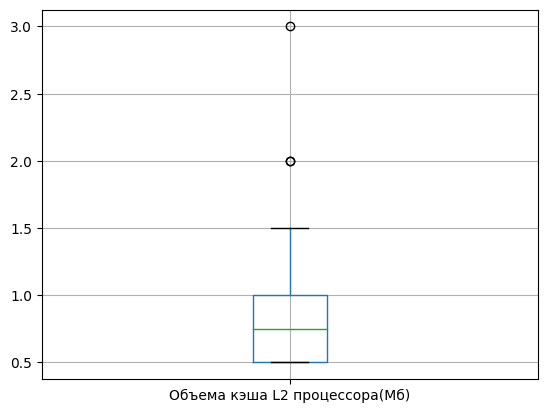

In [359]:
test = data.boxplot(num_cols[4], return_type='dict')
None

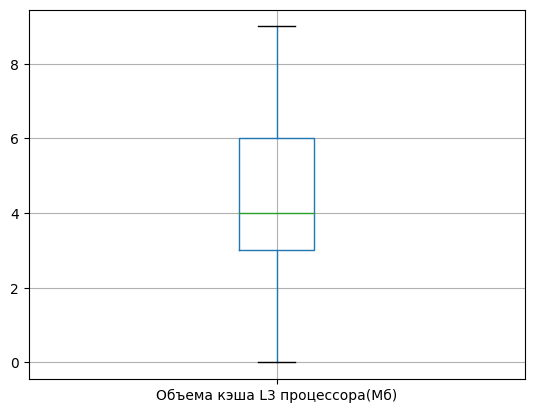

In [360]:
data.boxplot(num_cols[5])
None

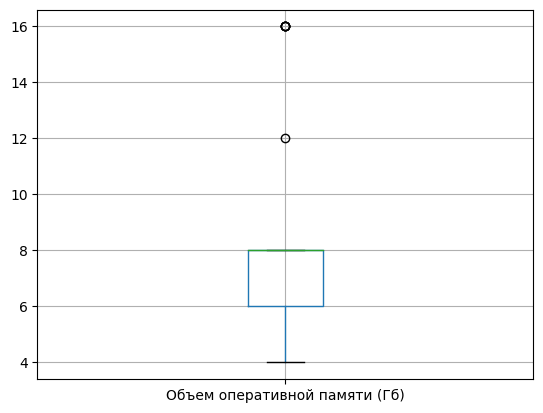

In [361]:
data.boxplot(column=num_cols[6])
None

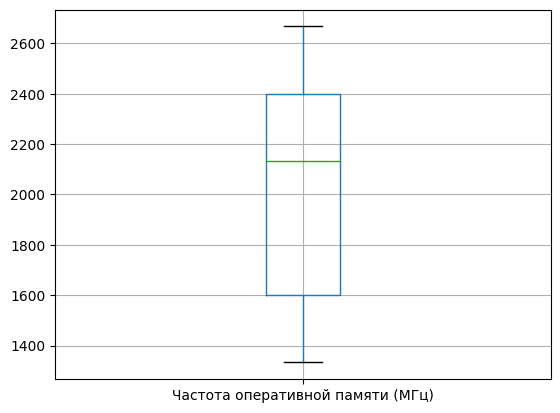

In [362]:
data.boxplot(column=num_cols[7])
None

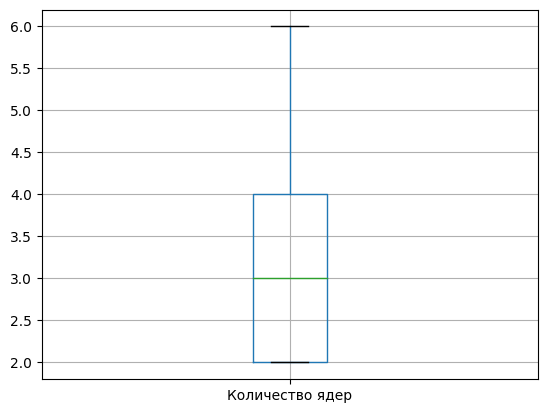

In [363]:
data.boxplot(num_cols[8])
None

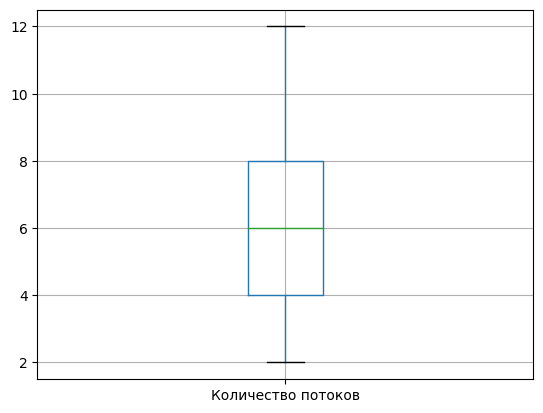

In [364]:
data.boxplot(num_cols[9])
None

In [365]:
def get_outlier(data, num_cols):
    res = {}
    for col in num_cols:
        q75, q25 = np.percentile(data[col], [75, 25])
        intr_qr = q75-q25
        top = q75+(1.5*intr_qr)
        low = q25-(1.5*intr_qr)
        out_arr = [data[data[col] > top].index.tolist()]
        out_arr.append(data[data[col] < low].index.tolist())
        res[col] = out_arr
    return res

In [366]:
get_outlier(data, num_cols)

{'Год выпуска процессора': [[], []],
 'Тактовая частота процессора(ГГц)': [[], []],
 'Максимальная тактовая частота процессора(ГГц)': [[], [27]],
 'Частота шины процессора(GT/s)': [[], []],
 'Объема кэша L2 процессора(Мб)': [[7, 17, 27], []],
 'Объема кэша L3 процессора(Мб)': [[], []],
 'Объем оперативной памяти (Гб)': [[0, 7, 11, 14, 18, 25], []],
 'Частота оперативной памяти (МГц)': [[], []],
 'Количество ядер': [[], []],
 'Количество потоков': [[], []]}

In [367]:
data = data.drop(index=[7])

<AxesSubplot:>

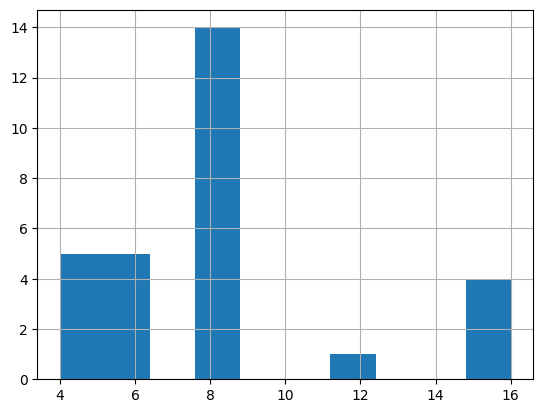

In [368]:
data['Объем оперативной памяти (Гб)'].hist()

In [369]:
data.loc[data['Объема кэша L3 процессора(Мб)'] == 0]['Объема кэша L3 процессора(Мб)']=np.NaN

In [370]:
data.columns

Index(['Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Количество ядер',
       'Количество потоков', 'Тип оперативной памяти',
       'Вид графического ускорителя', 'HDD', 'SSD',
       'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [371]:
data = data.loc[(data['Частота шины процессора(GT/s)'] != 0) & (data['Объема кэша L3 процессора(Мб)'] != 0)]

In [372]:
num_cols

['Год выпуска процессора',
 'Тактовая частота процессора(ГГц)',
 'Максимальная тактовая частота процессора(ГГц)',
 'Частота шины процессора(GT/s)',
 'Объема кэша L2 процессора(Мб)',
 'Объема кэша L3 процессора(Мб)',
 'Объем оперативной памяти (Гб)',
 'Частота оперативной памяти (МГц)',
 'Количество ядер',
 'Количество потоков']

In [373]:
data['Объем оперативной памяти (Гб)'] = (data['Объем оперативной памяти (Гб)'] // 8 > 0).astype(int)

In [374]:
data

,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Количество ядер,Количество потоков,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD,Результа ты в бенчмарке PCMark10
0,2018,2.2,4.1,8.0,1.0,9,1,2667,6,12,1,1,1,0,3726
1,2013,1.9,2.9,5.0,0.5,3,1,1596,2,4,0,0,1,0,1846
2,2016,2.0,2.0,4.0,0.5,3,0,2133,2,4,1,1,1,0,1426
3,2015,2.2,3.2,5.0,0.5,4,1,1600,2,4,0,0,0,1,2586
4,2015,1.8,2.9,5.0,0.5,3,1,1600,2,4,0,0,0,1,2039
5,2019,2.4,4.1,8.0,1.0,8,1,2666,4,8,1,1,1,1,3659
6,2013,2.6,3.2,5.0,0.5,3,0,1600,2,4,1,1,1,0,1824
8,2014,2.6,3.2,5.0,0.5,3,1,1600,2,4,0,1,1,0,2561
9,2018,1.6,3.9,4.0,1.0,6,1,2666,4,8,1,0,0,1,3045
10,2018,2.3,4.0,8.0,1.0,8,0,2666,4,8,1,1,1,0,2869


## Построение модели

### По алгоритму из ВКР

In [375]:
def get_std_coefs(X, y):
    res = [0]
    X_z = sm.add_constant(X.select_dtypes(include=[np.number]).dropna().apply(stats.zscore))
    Y_z = pd.DataFrame(y).apply(stats.zscore)
    model = sm.OLS(Y_z, X_z).fit()
    res.extend(model.params.tolist())
    return pd.Series(res)

In [376]:
def get_pivot(df, model, param, label, num):
    pivot_test = pd.DataFrame()
    predictors = model.params.index.tolist()
    n = len(predictors)
    i = np.ones(n).astype(int) * num
    pivot_test['id'] = pd.Series(i)
    pivot_test['predictors'] = predictors
    pivot_test['b'] = model.params.tolist()
    pivot_test['std_err'] = model.bse.tolist()
    influence = model.get_influence()
    pivot_test['std coef'] = get_std_coefs(df[param], df[label])
    pivot_test['t'] = model.tvalues.tolist()
    pivot_test['lower interval'] = model.conf_int(alpha=0.05)[:][0].tolist()
    pivot_test['upper interval'] = model.conf_int(alpha=0.05)[:][1].tolist()
    return pivot_test.set_index('id')

In [377]:
label = 'Результа ты в бенчмарке PCMark10'

In [378]:
X_data = data.drop(label, axis=1)
Y_data = data.drop(X_data.columns, axis=1)

In [379]:
predictors = data.drop(label, axis=1).to_dict()
sorted_predictors = sorted(predictors, key=lambda x: abs(data[x].corr(data[label])))

In [380]:
sorted_predictors

['HDD',
 'Тактовая частота процессора(ГГц)',
 'Вид графического ускорителя',
 'SSD',
 'Тип оперативной памяти',
 'Максимальная тактовая частота процессора(ГГц)',
 'Частота шины процессора(GT/s)',
 'Объем оперативной памяти (Гб)',
 'Частота оперативной памяти (МГц)',
 'Объема кэша L2 процессора(Мб)',
 'Год выпуска процессора',
 'Объема кэша L3 процессора(Мб)',
 'Количество потоков',
 'Количество ядер']

In [381]:
pred_list = []
Y = data[label]
pivot_df = pd.DataFrame()
i = 1
for predictor in sorted_predictors[::-1]:
    pred_list.append(predictor)
    X = sm.add_constant(data[pred_list])
    model = sm.OLS(Y, X).fit()
    F_crit = model.tvalues ** 2
    if F_crit[predictor] < 3.84:
        pred_list.pop()
    else:
        remove_list = list(F_crit[F_crit <= 2.71].index)
        for el in remove_list:
            if el in pred_list:
                pred_list.remove(el)
    if len(pred_list) != 0:
        model_info = get_pivot(data, model, pred_list, label, i)
        pivot_df = pd.concat([pivot_df, model_info], axis=0)
        i += 1

In [382]:
pivot_df

,predictors,b,std_err,std coef,t,lower interval,upper interval
id,,,,,,,
1,const,786.623239,211.523449,0.000000e+00,3.718847,350.982542,1222.263937
1,Количество ядер,626.653169,61.829660,5.898060e-17,10.135155,499.312600,753.993738
2,const,809.659091,221.640798,0.000000e+00,3.653024,352.214967,1267.103215
2,Количество ядер,439.806818,439.357094,5.898060e-17,1.001024,-466.981657,1346.595293
2,Количество потоков,90.863636,211.461631,8.968062e-01,0.429693,-345.571720,527.298993
3,const,780.909881,216.608767,0.000000e+00,3.605163,333.851358,1227.968404
3,Количество ядер,585.182068,166.779450,5.898060e-17,3.508718,240.966201,929.397934
3,Объема кэша L3 процессора(Мб),27.975755,104.168406,8.968062e-01,0.268563,-187.017268,242.968778
4,const,-83547.323317,124601.331056,0.000000e+00,-0.670517,-340711.831260,173617.184626


In [383]:
model.params

const                            235.279193
Количество ядер                  336.513035
Объем оперативной памяти (Гб)    521.399370
Частота шины процессора(GT/s)    152.270275
SSD                              287.311766
Вид графического ускорителя      482.990048
HDD                             -333.828775
dtype: float64

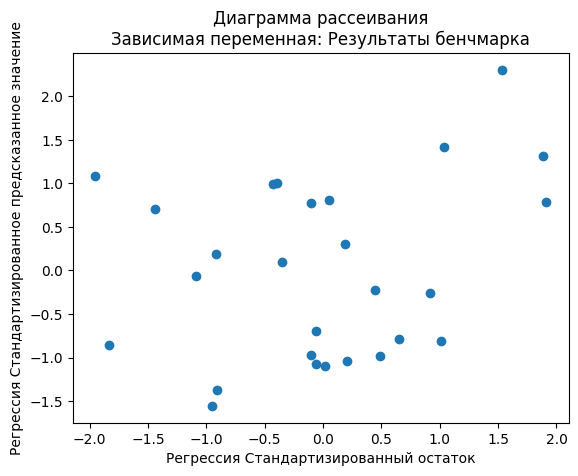

In [384]:
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
plt.scatter(standardized_residuals,pd.DataFrame(data[label]).apply(stats.zscore))
plt.title("Диаграмма рассеивания\nЗависимая переменная: Результаты бенчмарка")
plt.xlabel("Регрессия Стандартизированный остаток")
plt.ylabel("Регрессия Стандартизированное предсказанное значение")
None


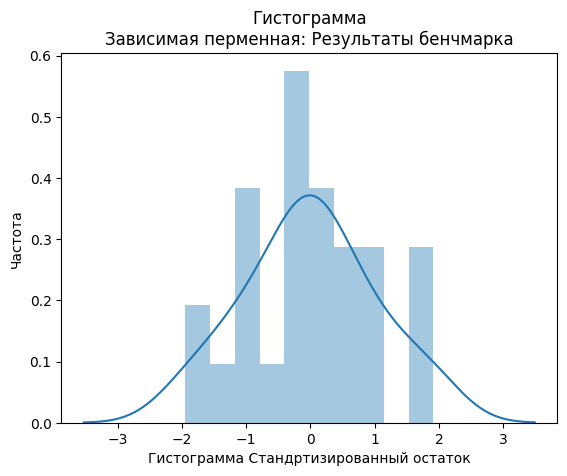

In [385]:
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
plt.title("Гистограмма\nЗависимая перменная: Результаты бенчмарка")
plt.xlabel("Гистограмма Стандртизированный остаток")
plt.ylabel("Частота")

sns.distplot(standardized_residuals, bins = 10)
None


In [412]:
#F - test
print("Тест RESET Рамсея")
ram = sm.stats.diagnostic.linear_reset(model, power=2, use_f = True)
print(ram)
# R^2
print("\nR =",sqrt(model.rsquared))
print("R^2 = ",model.rsquared)
print("Cкорректированный R^2=",model.rsquared_adj)

print("\nF - статистика = ",model.fvalue)
f_crit = stats.f.ppf(q = ram.pvalue, dfn=ram.df_num,dfd = ram.df_denom)
print("F критическое =",f_crit)

Тест RESET Рамсея
<F test: F=1.453741097830785, p=0.2532237314452441, df_denom=11, df_num=1>

R = 0.9746786214533607
R^2 =  0.9499984151182237
Cкорректированный R^2= 0.8916632327561513

F - статистика =  16.285170914900252
F критическое = 0.10964010691063124


In [413]:
if model.fvalue <f_crit:
    print("Так как F - статистика < критического значения (",f_crit,"), Модель не правильно специфицирована")
else:
    print("Так как F - статистика >= критического значения (",f_crit,"), Модель правильно специфицирована")
    # VIF
    vif = pd.DataFrame()
    vif["predictors"] = current_features
    vif ["VIF values"] = [variance_inflation_factor(data[current_features].values, i)
                          for i in range(len(data[current_features].columns))]
    print(vif)
    if max(vif["VIF values"])>=10:
        print("Присутствует мульиколлинеарность")
    else:
        print("Мультиколлинеарность не присутствует")
        dw = sm.stats.stattools.durbin_watson(model.resid)
        print("\nЗначение критерия Дурбина - Уотсона: ", dw)
        if abs(4 - dw) < abs(2 - dw):
            print("Отрицательная автокорреляция")
        elif dw < abs(2 - dw):
            print("Положительная автокорреляция")
        else:
            print("Остатки независимы")
            #print(model.summary())
            sh = shapiro(model.resid)
            print("\nЗначение критерия Шапиро", sh.statistic, "Значение коэффициента p", sh.pvalue)
            if sh.pvalue<0.05:
                print("Остатки не распределены нормально (p<0.05)")
            else:
                print("Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)")

Так как F - статистика >= критического значения ( 0.10964010691063124 ), Модель правильно специфицирована
                      predictors  VIF values
0                Количество ядер   18.821620
1  Объем оперативной памяти (Гб)    4.788900
2  Частота шины процессора(GT/s)   22.307348
3                            SSD    4.073450
4    Вид графического ускорителя    8.912419
5                            HDD   12.331374
Присутствует мульиколлинеарность


### Другой алгоритм

In [386]:
predictors = data.drop(label, axis=1).to_dict()
sorted_predictors = sorted(predictors, key=lambda x: abs(data[x].corr(data[label])))

In [387]:
sorted_predictors

['HDD',
 'Тактовая частота процессора(ГГц)',
 'Вид графического ускорителя',
 'SSD',
 'Тип оперативной памяти',
 'Максимальная тактовая частота процессора(ГГц)',
 'Частота шины процессора(GT/s)',
 'Объем оперативной памяти (Гб)',
 'Частота оперативной памяти (МГц)',
 'Объема кэша L2 процессора(Мб)',
 'Год выпуска процессора',
 'Объема кэша L3 процессора(Мб)',
 'Количество потоков',
 'Количество ядер']

In [388]:
pred_list = []
Y = data[label]
pivot_df = pd.DataFrame()
i = 1
for predictor in sorted_predictors[::-1]:
    pred_list.append(predictor)
    X = sm.add_constant(data[pred_list])
    model = sm.OLS(Y, X).fit()
    F_crit = model.tvalues ** 2
    if F_crit[predictor] < 3.84:
        pred_list.pop()
    else:
        remove_list = list(F_crit[F_crit <= 2.71].index)
        for el in remove_list:
            if el in pred_list:
                pred_list.remove(el)
    if len(pred_list) != 0:
        model_info = get_pivot(data, model, pred_list, label, i)
        pivot_df = pd.concat([pivot_df, model_info], axis=0)
        i += 1

In [389]:
for predictor in sorted_predictors[::-1]:
    pred_list.append(predictor)
    X = sm.add_constant(data[pred_list])
    model = sm.OLS(Y, X).fit()
    F_crit = model.tvalues ** 2

In [ ]:
def get_S(y, pred):
    return np.sum((y - pred) ** 2)

In [396]:
pred_list = []
add_predictors = sorted_predictors.copy()
while True:
    F_choice = 0
    for predictor in add_predictors:
        pred_list.append(predictor)
        X = sm.add_constant(data[pred_list])
        model = sm.OLS(Y, X).fit()
        if model.fvalue > F_choice:
            choice = predictor
            F_choice = model.fvalue
        pred_list.pop()
    pred_list.append(choice)
    if len(add_predictors) == 0:
        break
    else:
        add_predictors.remove(choice)
    if model.fvalue < 3.84:
        break    

In [419]:
X_test

,const,Количество ядер
0,1.0,6
1,1.0,2
2,1.0,2
3,1.0,2
4,1.0,2
5,1.0,4
6,1.0,2
7,1.0,6
8,1.0,2
9,1.0,4


In [438]:
X2 = X[X.columns[:2]]
model2 = sm.OLS(Y, X2).fit()

In [442]:
ram = sm.stats.diagnostic.linear_reset(model2, power=len(X.index.tolist()) - 1, use_f = True)
f_crit = stats.f.ppf(q = ram.pvalue, dfn=ram.df_num,dfd = ram.df_denom)

In [443]:
f_crit

1.962739232784244e-17

In [415]:
#F - test
print("Тест RESET Рамсея")
ram = sm.stats.diagnostic.linear_reset(model, power=2, use_f = True)
print(ram)
# R^2
print("\nR =",sqrt(model.rsquared))
print("R^2 = ",model.rsquared)
print("Cкорректированный R^2=",model.rsquared_adj)

print("\nF - статистика = ",model.fvalue)
f_crit = stats.f.ppf(q = ram.pvalue, dfn=ram.df_num,dfd = ram.df_denom)
print("F критическое =",f_crit)

Тест RESET Рамсея
<F test: F=1.453741097830785, p=0.2532237314452441, df_denom=11, df_num=1>

R = 0.9746786214533607
R^2 =  0.9499984151182237
Cкорректированный R^2= 0.8916632327561513

F - статистика =  16.285170914900252
F критическое = 0.10964010691063124


In [408]:
model.fvalue()

TypeError: 'numpy.float64' object is not callable

In [414]:
pred_list = []
while F_crit >= 3.84:
    for predictor in sorted_predictors[::-1]:
        if len(pred_list) > 1:
            X = sm.add_constant(data[pred_list])
            model = sm.OLS(Y, X).fit()
            S_after = get_S(Y, model.predict(X))
            S_after = get_S()
            F_choice = model.tvalues ** 2
    pred_list.append(predictor)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
def 

In [391]:
model.fvalue

16.285170914900334

In [336]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Результа ты в бенчмарке PCMark10   R-squared:                       0.925
Model:                                          OLS   Adj. R-squared:                  0.902
Method:                               Least Squares   F-statistic:                     40.94
Date:                              Thu, 08 Sep 2022   Prob (F-statistic):           3.35e-10
Time:                                      00:29:44   Log-Likelihood:                -186.22
No. Observations:                                27   AIC:                             386.4
Df Residuals:                                    20   BIC:                             395.5
Df Model:                                         6                                         
Covariance Type:                          nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           235.2792    206.498      1.139      0.268    -195.468     666.027
Количество ядер                 336.5130     67.919      4.955      0.000     194.837     478.189
Объем оперативной памяти (Гб)   521.3994    143.569      3.632      0.002     221.920     820.879
Частота шины процессора(GT/s)   152.2703     49.010      3.107      0.006      50.037     254.504
SSD                             287.3118    150.210      1.913      0.070     -26.020     600.644
Вид графического ускорителя     482.9900    191.308      2.525      0.020      83.928     882.052
HDD                            -333.8288    231.355     -1.443      0.165    -816.427     148.769
==============================================================================
Omnibus:                        0.143   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.344
Skew:                           0.106   Prob(JB):                        0.842
Kurtosis:                       2.489   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""